In [1]:
import pandas as pd
df = pd.read_csv('../data/data.csv')

In [6]:
df['timestamp_call_key']

0          240315173250 DAL1OA3M
1          240315124742 DAL15XHK
2          240317114237 DAL3BLK6
3          240314120849 PHX6PL4U
4          240314145902 DAL68RYS
                   ...          
1798793    240314120118 DAL2JPAQ
1798794    240314120336 DAL4K2UN
1798795    240316190932 PHX2S13U
1798796    240317213341 PHX35A2C
1798797    240316115154 PHX3G20E
Name: timestamp_call_key, Length: 1798798, dtype: object

In [8]:
import matplotlib.pyplot as plt
import numpy as np


In [22]:
s = df.value_counts('serial')
who_recall = s[s>1]
print("percentage of re-call : {:.2f}%".format(len(who_recall)/len(s)*100))

percentage of re-call : 14.22%


In [41]:
dist_recall = who_recall.value_counts()
dist_recall.plot(kind='bar')
plt.xlabel('Serial Number')
plt.ylabel('Count')
plt.title('Distribution of Who Recall')
plt.boxplot(df['timestamp_call_key'])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Boxplot of timestamp_call_key')
plt.show()


In [ ]:
plt.scatter(range(len(df['timestamp_call_key'])), df['timestamp_call_key'])
plt.xlabel('Index')
plt.ylabel('Timestamp Call Key')
plt.title('Scatter Plot of Timestamp Call Key')
plt.show()


In [36]:
call_2_times = who_recall[who_recall==2].index
sample = call_2_times[:5]
df_sample = df[df['serial'].isin(sample)]
df_sample  


,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,rank
463703,240315161156 PHX5X9UR,C,10003054689,BA,mn IA PP BA TS nl,resolved,1.0,833.50,[00],12/15/2013,...,1.0,833.50,[00],12/15/2013,NaN,0,1,L,0,1.0
463704,240315163902 PHX3QLKG,C,10003054689,PP,mn IA PP TR,resolved,1.0,833.50,[00],12/15/2013,...,1.0,833.50,[00],12/15/2013,NaN,0,1,L,0,2.0
705809,240315151930 PHX716UQ,C,10003052620,PP,mn IA PP,resolved,11.0,14.18,[00],3/20/2023,...,11.0,14.18,[00],3/20/2023,NaN,0,1,E,0,1.0
705810,240315153944 DAL2CEMC,C,10003052620,PT,mn IA PP BA TS nl PT TR,resolved,11.0,14.18,[00],3/20/2023,...,11.0,14.18,[00],3/20/2023,NaN,0,1,E,0,2.0
869847,240315152016 DAL1KWCL,C,10003052661,AT,mn IA PI BA TS nl AT,resolved,1.0,574.28,[00],3/21/2022,...,1.0,495.40,[00],3/21/2022,NaN,0,1,E,0,1.0
869848,240315152315 DAL4GMX4,C,10003052661,BA,mn IA BA TS nl,resolved,1.0,574.28,[00],3/21/2022,...,1.0,495.40,[00],3/21/2022,NaN,0,1,E,0,2.0
950651,240314085413 PHX3K3QT,f,20006001342,LC,IA IA BA MR nl nl mt RS TR LC,resolved,6.0,0.00,[00],6/11/2020,...,6.0,0.00,[00],6/11/2020,NaN,0,0,,0,1.0
950652,240314090038 DAL75JJV,f,20006001342,BA,IA IA BA MR nl mt RS TR,floor,6.0,0.00,[00],6/11/2020,...,6.0,0.00,[00],6/11/2020,NaN,0,0,,0,2.0
1200559,240315141324 DAL3FPST,d,20004023764,BA,mn IA BA,resolved,4.0,1982.64,[00],9/7/2011,...,4.0,1966.65,[00],9/7/2011,NaN,0,1,L,0,1.0
1200560,240317191525 DAL1B9I4,d,20004023764,BA,mn IA BA,resolved,4.0,1982.64,[00],9/7/2011,...,4.0,1966.65,[00],9/7/2011,NaN,0,1,L,0,2.0


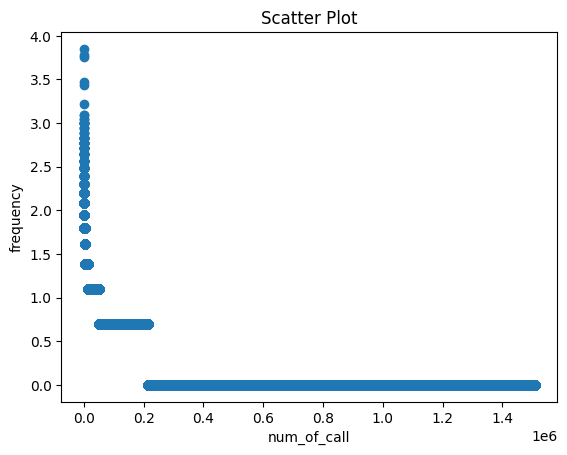

In [39]:
plt.scatter(list(range(len(s))), np.log(s))
plt.xlabel('num_of_call')
plt.ylabel('num_of_call')
plt.title('Scatter Plot')
plt.show()


In [2]:
# group by serial number and rank the calls based on timestamp
df_filtered = df#[~df.reason.isin(['PP', 'BA'])]
df_filtered.sort_values('timestamp_call_key', ascending=True)
df_filtered['rank'] = df_filtered.groupby('serial', as_index=False)['timestamp_call_key'].rank('min')
df_filtered

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,...,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,rank
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,...,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,1.0
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,...,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,1.0
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,...,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,1.0
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,...,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0,1.0
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,...,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,...,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0,1.0
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2/8/2022,...,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0,2.0
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],8/24/2023,...,7.0,35.66,[00],8/24/2023,NaN,0,0,,0,1.0
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,386.63,[00],5/15/2019,...,8.0,386.63,[00],5/15/2019,A,0,1,L,0,1.0
